In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#from dataset import train, test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python==4.5.5.64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


In [ ]:
import cv2
import os
import torch.optim as optim
import torch.nn as nn
import torch
from torchvision import transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/ComputerVision_lab/CW' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

In [ ]:

#TEST images
test_dataset_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/test'
GOOGLE_DRIVE_PATH_TEST_DATASET = os.path.join('drive', 'My Drive', test_dataset_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST_DATASET))

#TEST images
test_images_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/test/images'
GOOGLE_DRIVE_PATH_TEST_IMAGES = os.path.join('drive', 'My Drive', test_images_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST_IMAGES))

#TEST LABELS
test_labels_directory = 'Colab Notebooks/ComputerVision_lab/CW/dataset/test/labels'
GOOGLE_DRIVE_PATH_TEST_LABELS = os.path.join('drive', 'My Drive', test_labels_directory)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST_LABELS))

['images', 'labels']
['image_2402.jpeg', 'image_2693.jpeg', 'image_2484.jpeg', 'image_2544.jpeg', 'image_2490.jpeg', 'image_2662.jpeg', 'image_2699.jpeg', 'image_2635.jpeg', 'image_2732.jpeg', 'image_2493.jpeg', 'image_2582.jpeg', 'image_2512.jpeg', 'image_2605.jpeg', 'image_2590.jpeg', 'image_2614.jpeg', 'image_2439.jpeg', 'image_2733.jpeg', 'image_2443.jpeg', 'image_2500.jpeg', 'image_2587.jpeg', 'image_2492.jpeg', 'image_2488.jpeg', 'image_2509.jpeg', 'image_2713.jpeg', 'image_2632.jpeg', 'image_2476.jpeg', 'image_2459.jpeg', 'image_2438.jpeg', 'image_2547.jpeg', 'image_2550.jpeg', 'image_2424.jpeg', 'image_2411.jpeg', 'image_2448.jpeg', 'image_2649.jpeg', 'image_2608.jpeg', 'image_2504.jpeg', 'image_2541.jpeg', 'image_2548.jpeg', 'image_2435.jpeg', 'image_2457.jpeg', 'image_2450.jpeg', 'image_2633.jpeg', 'image_2557.jpeg', 'image_2568.jpeg', 'image_2646.jpeg', 'image_2575.jpeg', 'image_2618.jpeg', 'image_2719.jpeg', 'image_2468.jpeg', 'image_2730.jpeg', 'image_2668.jpeg', 'image_26

In [ ]:
from skimage import transform
from skimage import img_as_ubyte, io, color
def import_selected_data(dataset_path):
  test_images = []
  test_labels = []
  new_size = (90, 90)

  #TEST
  #for filename in sorted (os.listdir(GOOGLE_DRIVE_PATH_TEST_IMAGES)):
  for filename in sorted (os.listdir(dataset_path + '/images')):
    if filename.endswith('jpeg') or filename.endswith('jpg') :
      image = io.imread(os.path.join(dataset_path + '/images',filename))
      #HERE TOO, IMAGES ARE NOT BEING CHANGED
      #img = img_as_ubyte(color.rgb2gray(image))
      img_resized = transform.resize(image,new_size)
      test_images.append(img_resized)       

  for filename in sorted(os.listdir(dataset_path + '/labels')):
    if filename.endswith('txt') : 
    #labels_filename = filename.split('.')[0] + 'txt'
      labels_path = os.path.join(dataset_path + '/labels', filename)
      with open(labels_path, 'r') as f:
        label = f.read().strip()
        test_labels.append(label)
  return test_images, test_labels
        

  

In [ ]:
PATH_TO_DATASET = "/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/dataset/test"
PATH_TO_PERSONAL_DATASET = "/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/CVWildPhotosDataset"

X_test, y_test = import_selected_data(PATH_TO_PERSONAL_DATASET)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.conv6 = nn.Conv2d(512, 1024, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(1024)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1024 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 3)
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.2)
        self.dropout3 = nn.Dropout(p=0.2)
        self.dropout4 = nn.Dropout(p=0.2)
        self.dropout5 = nn.Dropout(p=0.2)
        self.dropout6 = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout2(x)
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout3(x)
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout4(x)
        x = self.bn5(F.relu(self.conv5(x)))
        x = self.pool(x)
        x = self.dropout5(x)
        x = self.bn6(F.relu(self.conv6(x)))
        x = self.pool(x)
        x = self.dropout6(x)
        x = x.view(-1, 1024 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.transforms import ToPILImage
from torchvision.transforms import Grayscale

class CustomDataset(Dataset):
  def __init__(self, annotations_dir, img_dir, transform=None, target_transform=None):
    
    self.img_dir = img_dir
    self.img_filenames = os.listdir(self.img_dir)
    self.transform = transform
    self.target_transform = target_transform

    self.img_labels = []
    for filename in os.listdir(annotations_dir):
      with open(os.path.join(annotations_dir, filename), 'r') as f:
        label = int(f.read().strip())
        img_filename = filename.replace('.txt', '.jpeg')
        self.img_labels.append((img_filename, label))    

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, index):
    # Get the image file name and full path
    img_path = os.path.join(self.img_dir, self.img_labels[index][0])
    image = read_image(img_path)
    image = ToPILImage()(image) # Convert tensor to PIL image
    # Convert the image to grayscale
    grayscale_transform = Grayscale(num_output_channels=1)
    image = grayscale_transform(image)
    label = self.img_labels[index][1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch
from torchvision import transforms
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/ComputerVision_lab/CW' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)



# Define the transformations to apply to the test data
transform_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the test dataset
test_dataset = CustomDataset(GOOGLE_DRIVE_PATH_TEST_LABELS, GOOGLE_DRIVE_PATH_TEST_IMAGES, transform=transform_test)

# Create the test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

state_dict = torch.load(GOOGLE_DRIVE_PATH + 'best_CNN_model.pth', map_location=torch.device('cpu'))
model = MyModel()
model.load_state_dict(state_dict)


# Set the model to evaluation mode
model.eval()

# Keep track of the accuracy and loss on the test set
test_loss = 0.0
correct = 0
total = 0
# Initialize empty arrays to store predicted labels and ground truth labels
preds = []
truths = []

# define the loss function and optimizer

criterion = nn.CrossEntropyLoss(weight=torch.Tensor([3, 1, 7]).to(device))
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
# Iterate over the test DataLoader
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        test_loss += loss.item()  
        # Append predicted labels and ground truth labels to the arrays
        preds.extend(predicted.cpu().numpy())
        truths.extend(labels.cpu().numpy())

# Compute the accuracy and average loss on the test set
accuracy = 100 * correct / total
average_loss = test_loss / len(test_loader)

print('Accuracy on the test set: {:.2f}%'.format(accuracy))
print('Average loss on the test set: {:.4f}'.format(average_loss))

Accuracy on the test set: 90.17%
Average loss on the test set: 0.3405


              precision    recall  f1-score   support

           0       0.67      0.88      0.76        51
           1       0.99      0.91      0.95       388
           2       0.46      0.84      0.59        19

    accuracy                           0.90       458
   macro avg       0.71      0.88      0.77       458
weighted avg       0.93      0.90      0.91       458



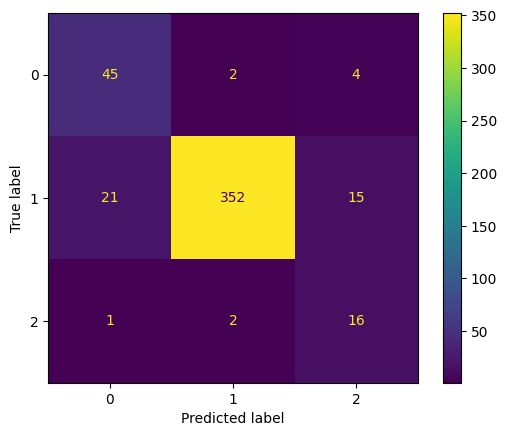

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, metrics

metrics.ConfusionMatrixDisplay.from_predictions(truths, preds)
# Print the classification report
print(classification_report(truths, preds))

SVM + SIFT


In [ ]:
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics

sift = cv2.SIFT_create()


svm_sift_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/svm_model.joblib')
kmeans = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/kclustering_svm_sift_model.joblib')

k = 60
# Convert test set into codeword histograms
hist_list = []

for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    kp, des = sift.detectAndCompute(img, None)

    if des is not None:
        hist = np.zeros(k)

        idx = kmeans.predict(des)

        for j in idx:
            hist[j] = hist[j] + (1 / len(des))

        # hist = scale.transform(hist.reshape(1, -1))
        hist_list.append(hist)

    else:
        hist_list.append(None)

# Remove potential cases of images with no descriptors
idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
hist_list = [hist_list[i] for i in idx_not_empty]
y_test = [y_test[i] for i in idx_not_empty]
hist_array = np.vstack(hist_list)

y_pred_new = svm_sift_model.predict(hist_array).tolist()

#metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(f"""Classification report for classifier {svm_sift_model}:
      {metrics.classification_report(y_test, y_pred_new)}\n""")

Classification report for classifier SVC(C=10, class_weight='balanced', gamma=1):
                    precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.42      0.62      0.50         8
           2       0.40      0.40      0.40        15

    accuracy                           0.39        31
   macro avg       0.36      0.38      0.36        31
weighted avg       0.37      0.39      0.37        31




MLP + SIFT

In [ ]:

sift2 = cv2.SIFT_create()
mlp_sift_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/mlp_sift_model.joblib')
kmeans2 = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/kclustering_mlp_sift_model.joblib')
# Convert test set into codeword histograms
hist_list = []

for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    kp, des = sift2.detectAndCompute(img, None)

    if des is not None:
        hist = np.zeros(k)

        idx = kmeans2.predict(des)

        for j in idx:
            hist[j] = hist[j] + (1 / len(des))

        #hist = scale.transform(hist.reshape(1, -1))
        hist_list.append(hist)

    else:
        hist_list.append(None)

# Remove potential cases of images with no descriptors
idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
hist_list = [hist_list[i] for i in idx_not_empty]
y_test = [y_test[i] for i in idx_not_empty]
hist_array = np.vstack(hist_list)

y_pred_new = mlp_sift_model.predict(hist_array).tolist()


print(f"""Classification report for classifier {mlp_sift_model}:
      {metrics.classification_report(y_test, y_pred_new)}\n""")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, random_state=1,
              verbose=True):
                    precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.27      0.88      0.41         8
           2       0.00      0.00      0.00        15

    accuracy                           0.29        31
   macro avg       0.22      0.38      0.24        31
weighted avg       0.17      0.29      0.19        31




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier SVC(C=1, kernel='poly'):

                    precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.29      0.88      0.44         8
           2       0.00      0.00      0.00        15

    accuracy                           0.29        31
   macro avg       0.21      0.38      0.24        31
weighted avg       0.16      0.29      0.19        31



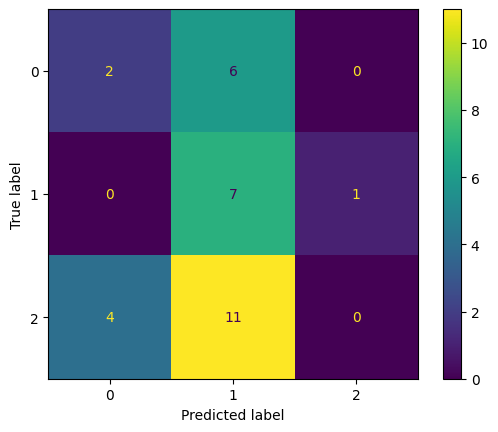

In [ ]:
from skimage import feature, util
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics

svm_hog_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/svm_HOG_model.joblib')

hog_features_test = []
for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    #img = X_test[i]

    fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    # Pad feature descriptor with zeros to make it the same length
    #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
    #hist = scale.transform(fd.reshape(1, -1))
    hog_features_test.append(fd)

    


# Make predictions on test data

#y_pred = my_hog_classifier.predict(hog_features_test)
y_pred = svm_hog_model.predict(hog_features_test)

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(f"""Classification report for classifier {svm_hog_model}:\n
      {metrics.classification_report(y_test, y_pred)}""")

Classification report for classifier MLPClassifier(activation='tanh', alpha=0.001, max_iter=1000, random_state=42):

                    precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.26      0.75      0.39         8
           2       0.00      0.00      0.00        15

    accuracy                           0.19        31
   macro avg       0.09      0.25      0.13        31
weighted avg       0.07      0.19      0.10        31



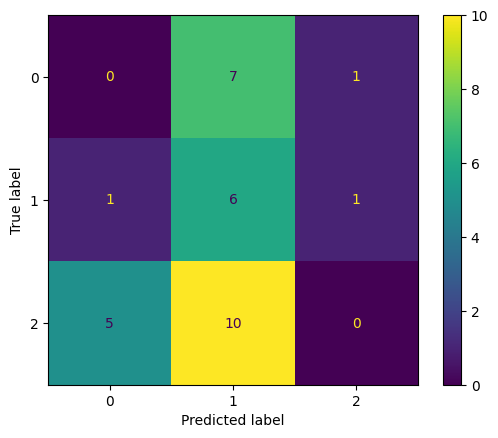

In [ ]:
mlp_hog_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/mlp_HOG_model.joblib')

hog_features_test = []
for i in range(len(X_test)):
    img = img_as_ubyte(color.rgb2gray(X_test[i]))
    #img = X_test[i]

    fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
    # Pad feature descriptor with zeros to make it the same length
    #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
    #hist = scale.transform(fd.reshape(1, -1))
    hog_features_test.append(fd)

    


# Make predictions on test data

#y_pred = my_hog_classifier.predict(hog_features_test)
y_pred = mlp_hog_model.predict(hog_features_test)

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(f"""Classification report for classifier {mlp_hog_model}:\n
      {metrics.classification_report(y_test, y_pred)}""")

In [ ]:

PATH_TO_DATASET = "/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/dataset/test"
def MaskDetection(test_dataset, model_type):
  
  if model_type == "mlp+hog":
    mlp_hog_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/mlp_HOG_model.joblib')

    hog_features_test = []
    for i in range(len(X_test)):
        img = img_as_ubyte(color.rgb2gray(X_test[i]))
        #img = X_test[i]

        fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
        # Pad feature descriptor with zeros to make it the same length
        #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
        #hist = scale.transform(fd.reshape(1, -1))
        hog_features_test.append(fd)

        


    # Make predictions on test data

    #y_pred = my_hog_classifier.predict(hog_features_test)
    y_pred = mlp_hog_model.predict(hog_features_test)

    # Select 4 random images from the test set
    indices = random.sample(range(len(X_test)), 4)
    selected_images = [X_test[i] for i in indices]
    selected_labels = [y_test[i] for i in indices]
    predicted_labels = [y_pred[i] for i in indices]

    # Display the images
    for i in range(4):
        imshow2(selected_images[i], selected_labels[i], predicted_labels[i])

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    print(f"""Classification report for classifier {mlp_hog_model}:\n
          {metrics.classification_report(y_test, y_pred)}""")
    
  #--------------------------------------------------------------svm_hog-------------------------------------------------------------------
  if model_type == "svm+hog":
    svm_hog_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/ComputerVision_lab/CW/svm_HOG_model.joblib')

    hog_features_test = []
    for i in range(len(X_test)):
        img = img_as_ubyte(color.rgb2gray(X_test[i]))
        #img = X_test[i]

        fd = feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2')
        # Pad feature descriptor with zeros to make it the same length
        #fd_padded = np.pad(fd, (0, max_len - len(fd)), mode='constant')
        #hist = scale.transform(fd.reshape(1, -1))
        hog_features_test.append(fd)

        


    # Make predictions on test data

    #y_pred = my_hog_classifier.predict(hog_features_test)
    y_pred = svm_hog_model.predict(hog_features_test)

        # Select 4 random images from the test set
    indices = random.sample(range(len(X_test)), 4)
    selected_images = [X_test[i] for i in indices]
    selected_labels = [y_test[i] for i in indices]
    predicted_labels = [y_pred[i] for i in indices]

    # Display the images
    for i in range(4):
        imshow2(selected_images[i], selected_labels[i], predicted_labels[i])

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    print(f"""Classification report for classifier {svm_hog_model}:\n
          {metrics.classification_report(y_test, y_pred)}""")
  #----------------------------------------------------------------CNN------------------------------------------------------------------------------
  if model_type == "cnn":
    # Define the transformations to apply to the test data
    transform_test = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    # Load the test dataset
    test_dataset = CustomDataset(test_dataset + "/labels", test_dataset + "/images", transform=transform_test)
    # Create the test DataLoader
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    state_dict = torch.load(GOOGLE_DRIVE_PATH + 'best_CNN_model.pth', map_location=torch.device('cpu'))
    model = MyModel()
    model.load_state_dict(state_dict)


    # Set the model to evaluation mode
    model.eval()
    # Keep track of the accuracy and loss on the test set
    test_loss = 0.0
    correct = 0
    total = 0
    # Initialize empty arrays to store predicted labels and ground truth labels
    preds = []
    truths = []

    # define the loss function and optimizer

    criterion = nn.CrossEntropyLoss(weight=torch.Tensor([3, 1, 7]).to(device))
    #criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
    # Iterate over the test DataLoader
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            test_loss += loss.item()  
            # Append predicted labels and ground truth labels to the arrays
            preds.extend(predicted.cpu().numpy())
            truths.extend(labels.cpu().numpy())

    

    # Compute the accuracy and average loss on the test set
    accuracy = 100 * correct / total
    average_loss = test_loss / len(test_loader)

    # Select 4 random images from the test dataset
    images, labels = next(iter(test_loader))
    indices = random.sample(range(len(images)), 4)
    selected_images = [images[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    predicted_labels = [predicted[i] for i in range(4)]
    for i in range(4):
        imshow(selected_images[i], selected_labels[i], predicted_labels[i])

    print('Accuracy on the test set: {:.2f}%'.format(accuracy))
    print('Average loss on the test set: {:.4f}'.format(average_loss))
    metrics.ConfusionMatrixDisplay.from_predictions(truths, preds)
    # Print the classification report
    print(classification_report(truths, preds))


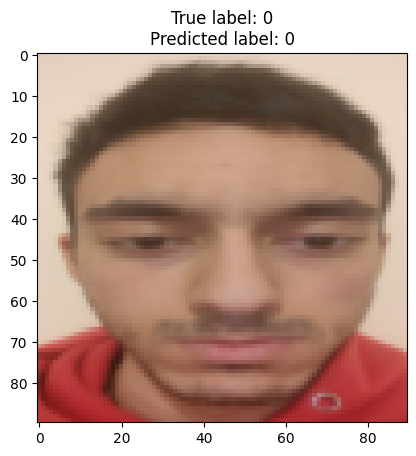

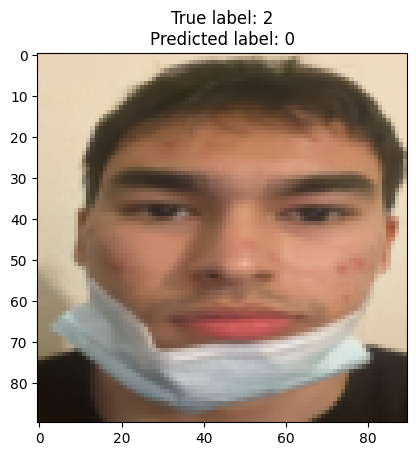

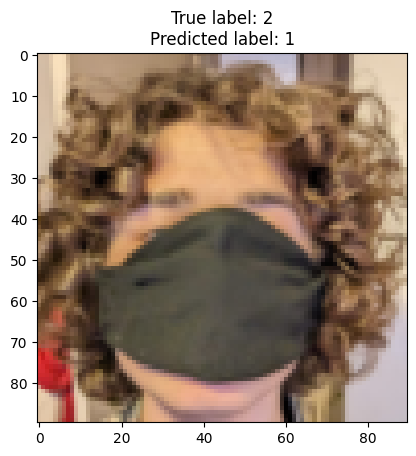

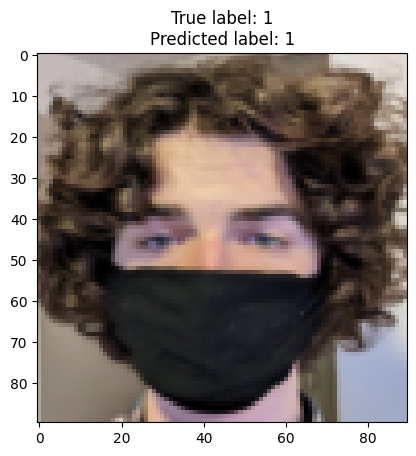

Classification report for classifier SVC(C=1, kernel='poly'):

                        precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.29      0.88      0.44         8
           2       0.00      0.00      0.00        15

    accuracy                           0.29        31
   macro avg       0.21      0.38      0.24        31
weighted avg       0.16      0.29      0.19        31



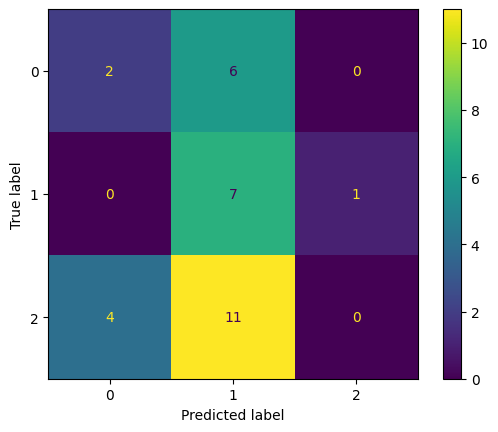

In [ ]:
MaskDetection(PATH_TO_DATASET, "svm+hog")

In [ ]:
import random
# Define a function to display the images
def imshow(img, true_label, pred_label):
    img = img / 2 + 0.5  # unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f'True label: {true_label}\nPredicted label: {pred_label}')
    plt.show()

def imshow2(img, true_label, pred_label):
  plt.imshow(img)
  plt.title(f'True label: {true_label}\nPredicted label: {pred_label}')
  plt.show()

